In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import sys
sys.path.append('src')
from poisson_disk import PoissonDiskSampler
%aimport settings
import settings
%aimport cnn_utils
import cnn_utils
%aimport geometry_utils
import geometry_utils
%aimport dataset_utils
import dataset_utils

import numpy as np
import cv2
import matplotlib
import matplotlib.pylab as plt
sys.path.append(settings.CAFFE_PYTHON_PATH)
import caffe
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [4]:
cub = dataset_utils.CUB_200_2011()
cub_annotations = dataset_utils.BerkeleyAnnotaionHelper(cub)
IDtrain, IDtest = cub.train_test_id()
imgs_addr = cub.image_addrs()

dh = cnn_utils.DeepHelper()

In [5]:
part = 'head'
radius = 15

153 - 193 - 222 - 271
8


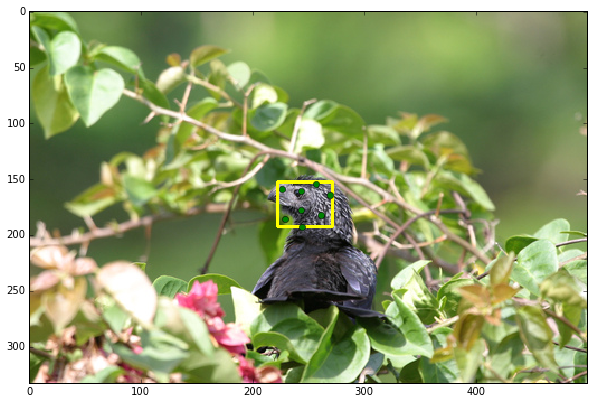

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

img_id = IDtrain[95]

img = caffe.io.load_image(imgs_addr[img_id])
box = cub_annotations.annotation(img_id, part)
print box

dh.init_with_image(img)

positive_points = box.generate_points_inside(param=radius, img=img)

geometry_utils.draw_points(positive_points, ax, color='green')
print len(positive_points)
ax.imshow(box.draw_box(img, (1, 1, 0)))